In [8]:
import sys
stdout=sys.stdout
from vars_db import vars_db
import numexpr
import os
import root_numpy
import ROOT
import cuts
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.lines as lines
#plt.ion()

In [9]:
branches = ['Lb_hop_LoKi_mass_bv', 'log(Lb_FDCHI2_OWNPV)']
training_variables = ['Lb_IPCHI2_OWNPV',
                      'Lb_IP_OWNPV',
                      'Lb_PT',
                      'Lb_P',
                      'L0_PT',
                      'p_PT',
                      'pi_PT',
                      'L0_ORIVX_CHI2',
                      'l1_IPCHI2_OWNPV',
                      'l2_IPCHI2_OWNPV',
                      'Lb_HOP',
                      'L0_DIRA_OWNPV',
                      'p_P', 
                      'pi_P',
                      'L0_P',
                      'Lb_ConeIsoInfoH1_CC_PTASYM',
                      'Lb_ConeIsoInfoH2_CC_PTASYM',
                      'Lb_ConeIsoInfoL1_CC_PTASYM', 
                      'Lb_ConeIsoInfoL2_CC_PTASYM',
                      'Lb_TrackIsoInfoH1_CONEMULT',
                      'Lb_TrackIsoInfoH2_CONEMULT',
                      'Lb_TrackIsoInfoL1_CONEMULT', 
                      'Lb_TrackIsoInfoL2_CONEMULT'] #in the end this should be taken from vars_db
branches.extend(training_variables)
additional_branches = ['Lb_M', 'Lb_MM']

In [10]:
 #get kerberos token for eos
import getpass
os.system("echo %s | kinit gandreas@CERN.CH" %getpass.getpass()) 

········


0

Password for gandreas@CERN.CH: 


In [11]:
#get data and mc trees
MC_tree = ROOT.TChain('Lb2LemuTuple/DecayTree')
MC_tree.Add(os.getenv("GUIDOANAEOSLOC")+"tuples/S28/MC/Lb_Lemu_MC_2016_M*.root")

data_tree = ROOT.TChain('Lb2LemuTuple/DecayTree')
#temporary fix:
from glob import glob
for file in glob(os.getenv("LBMICKJOBLOC")+"209/[0-5][0-9]/DVNtuple.root"):
    data_tree.AddFile(file)
for file in glob(os.getenv("LBMICKJOBLOC")+"210/[0-5][0-9]/DVNtuple.root"):
    data_tree.AddFile(file)

In [12]:
from tools.convert_data import convert_data

import imp
import sys
imp.reload (sys.modules['tools.convert_data'])


signal_training_cut = cuts.Lb_Lemu_matching+cuts.Lb_Lemu_trigger_run1_full

#print signal_training_cut.GetTitle()
train_data, train_labels, test_data, test_labels = convert_data (MC_tree,
                                                                 (cuts.Lb_Lemu_matching+cuts.Lb_Lemu_trigger_run2_full_for_MVA_training).GetTitle(),
                                                                 data_tree,
                                                                 (cuts.Lb_Lemu_sidebands + cuts.Lb_Lemu_trigger_run2_full_for_MVA_training).GetTitle(),
                                                                 branches+additional_branches,
                                                                 test_frac = 0) #all in train_data


#let's also prepare signal and background in separate dataframes for convenience
train_data_with_labels = pd.DataFrame(np.hstack((train_data, train_labels.reshape(train_labels.shape[0], -1))),
                  columns=branches+additional_branches+['labels'])

train_data_signal_with_labels = train_data_with_labels.loc[train_data_with_labels['labels']>0.5]
train_data_background_with_labels = train_data_with_labels.loc[train_data_with_labels['labels']<0.5]


In [13]:
def linear_cut_1(x):
    return 2900+170*x


def linear_cut_alpha(x):
    return 2.0-0.035*x

def linear_cut_alpha_2(x):
    return 0+0.035*x

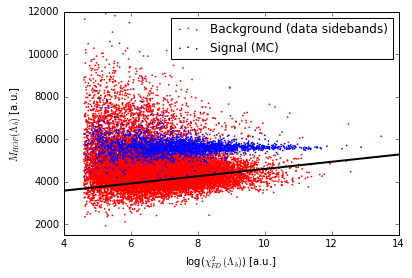

In [16]:
signal_scatter = train_data_background_with_labels.plot(kind='scatter',
                                                        y='Lb_hop_LoKi_mass_bv',
                                                        x='log(Lb_FDCHI2_OWNPV)',
                                                        xlim=(1500,12000),
                                                        edgecolors='None',
              color='red', label='Background (data sidebands)', s=3)

train_data_signal_with_labels.plot(kind='scatter',
                                   y='Lb_hop_LoKi_mass_bv',
                                   ylim=(1500,12000),
                                   x='log(Lb_FDCHI2_OWNPV)',
                                   xlim=(4,14),
                                   edgecolors='None',
        color='blue', label='Signal (MC)', s=3, ax=signal_scatter)

signal_scatter.set_xlabel('log({0}) {1}'.format(vars_db['Lb_FDCHI2_OWNPV']['title'], vars_db['Lb_FDCHI2_OWNPV']['unit']).replace('#','\\'))
signal_scatter.set_ylabel('{0} {1}'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#','\\'))

line1_point_1 = (4, linear_cut_1(4))
line1_point_2 = (14, linear_cut_1(14))
(line_xs, line_ys) = zip(*[line1_point_1, line1_point_2])

signal_scatter.add_line(lines.Line2D(line_xs, line_ys, linewidth=2, color='black'))
plt.savefig("plots/HOP_cut.pdf")
plt.show()


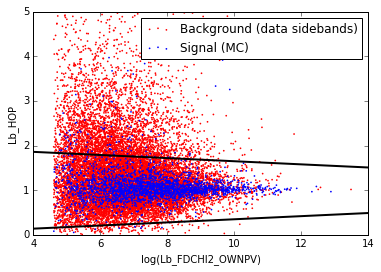

In [13]:
signal_scatter = train_data_background_with_labels.plot(kind='scatter',
                                                        y='Lb_HOP',
                                                        x='log(Lb_FDCHI2_OWNPV)',
                                                        xlim=(1500,12000),
                                                        edgecolors='None',
              color='red', label='Background (data sidebands)', s=3)

train_data_signal_with_labels.plot(kind='scatter',
                                   y='Lb_HOP',
                                   ylim=(0,5),
                                   x='log(Lb_FDCHI2_OWNPV)',
                                   xlim=(4,14),
                                   edgecolors='None',
        color='blue', label='Signal (MC)', s=3, ax=signal_scatter)



line1_point_alpha_1 = (4, linear_cut_alpha(4))
line1_point_alpha_2 = (14, linear_cut_alpha(14))
(line_xs_alpha, line_ys_alpha) = zip(*[line1_point_alpha_1, line1_point_alpha_2])

signal_scatter.add_line(lines.Line2D(line_xs_alpha, line_ys_alpha, linewidth=2, color='black'))

line2_point_alpha_1 = (4, linear_cut_alpha_2(4))
line2_point_alpha_2 = (14, linear_cut_alpha_2(14))
(line_xs_alpha_2, line_ys_alpha_2) = zip(*[line2_point_alpha_1, line2_point_alpha_2])

signal_scatter.add_line(lines.Line2D(line_xs_alpha_2, line_ys_alpha_2, linewidth=2, color='black'))

plt.show()

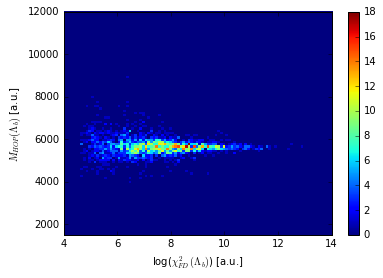

In [16]:
signal_hist = plt.hist2d(train_data_signal_with_labels['log(Lb_FDCHI2_OWNPV)'], train_data_signal_with_labels['Lb_hop_LoKi_mass_bv'],
           range=((4,14), (1500,12000),),
           bins=100,)

plt.xlabel('log({0}) {1}'.format(vars_db['Lb_FDCHI2_OWNPV']['title'], vars_db['Lb_FDCHI2_OWNPV']['unit']).replace('#', '\\'))
plt.ylabel('{0} {1}'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()

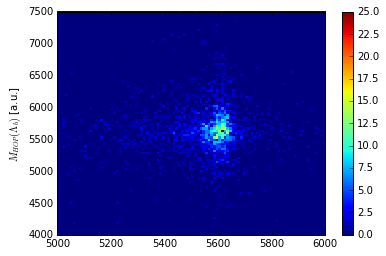

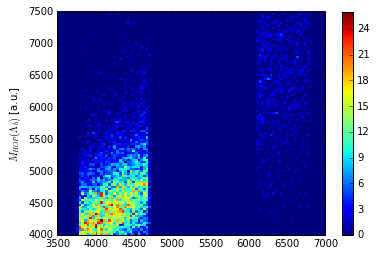

In [18]:

signal_mhist = plt.hist2d(train_data_signal_with_labels['Lb_M'], train_data_signal_with_labels['Lb_hop_LoKi_mass_bv'],
           range=((5000,6000), (4000,7500),),
           bins=100,)

#plt.xlabel('log({0}) {1}'.format(vars_db['Lb_M']['title'], vars_db['Lb_M']['unit']))
plt.ylabel('{0} {1}'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()

background_mhist = plt.hist2d(train_data_background_with_labels['Lb_M'], train_data_background_with_labels['Lb_hop_LoKi_mass_bv'],
           range=((3500,7000), (4000,7500),),
           bins=100,)


#plt.xlabel('log({0}) {1}'.format(vars_db['Lb_M']['title'], vars_db['Lb_M']['unit']))
plt.ylabel('{0} {1}'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()

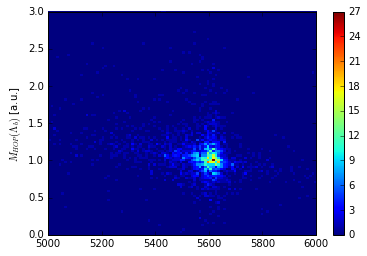

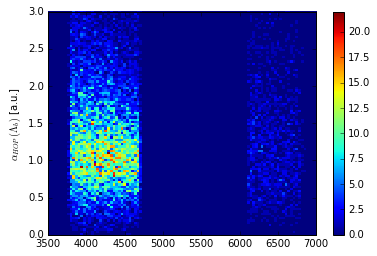

In [19]:
signal_mhist = plt.hist2d(train_data_signal_with_labels['Lb_M'], train_data_signal_with_labels['Lb_HOP'],
           range=((5000,6000), (0,3),),
           bins=100,)

#plt.xlabel('log({0}) {1}'.format(vars_db['Lb_M']['title'], vars_db['Lb_M']['unit']))
plt.ylabel('{0} {1}'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_HOP']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()


background_mhist = plt.hist2d(train_data_background_with_labels['Lb_M'], train_data_background_with_labels['Lb_HOP'],
           range=((3500,7000), (0,3),),
           bins=100,)

#plt.xlabel('log({0}) {1}'.format(vars_db['Lb_M']['title'], vars_db['Lb_M']['unit']))
plt.ylabel('{0} {1}'.format(vars_db['Lb_HOP']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()

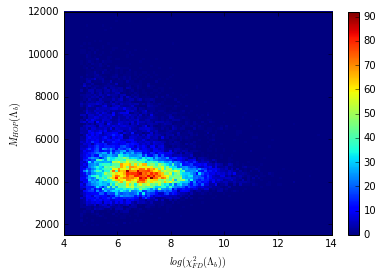

In [13]:
background_hist = plt.hist2d(train_data_background_with_labels['log(Lb_FDCHI2_OWNPV)'], train_data_background_with_labels['Lb_hop_LoKi_mass_bv'],
           range=((4,14), (1500,12000),),
           bins=100,)

plt.xlabel('$log({0}) {1}$'.format(vars_db['Lb_FDCHI2_OWNPV']['title'], vars_db['Lb_FDCHI2_OWNPV']['unit']).replace('#', '\\'))
plt.ylabel('${0} {1}$'.format(vars_db['Lb_hop_LoKi_mass_bv']['title'], vars_db['Lb_hop_LoKi_mass_bv']['unit']).replace('#', '\\'))


plt.colorbar()
plt.show()

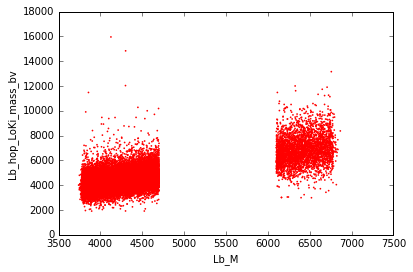

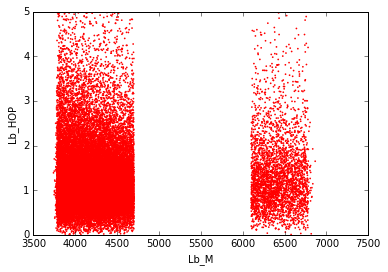

In [14]:
background_scatter_2 = train_data_background_with_labels.plot(kind='scatter',
                                                        y='Lb_hop_LoKi_mass_bv',
                                                        x='Lb_M',
                                                              color='red',
                                                         edgecolors='None', s=3)

background_scatter_2_alpha = train_data_background_with_labels.plot(kind='scatter',
                                                        y='Lb_HOP',
                                                              ylim=(0,5),
                                                        x='Lb_M',
                                                              color='red',
                                                         edgecolors='None', s=3)
plt.show()

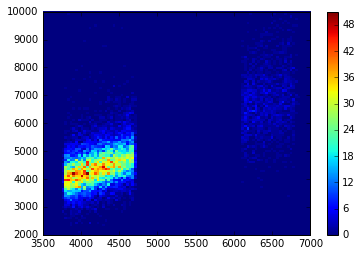

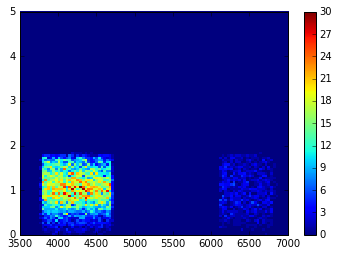

In [36]:
background_hist_hopm = plt.hist2d(train_data_background_with_labels['Lb_M'], train_data_background_with_labels['Lb_hop_LoKi_mass_bv'], 
           range=((3500,7000), (2000,10000),),
           bins=100,)
plt.colorbar()
plt.show()

background_hist_alpha = plt.hist2d(train_data_background_cut_alpha['Lb_M'], train_data_background_cut_alpha['Lb_HOP'], 
           range=((3500,7000), (0,5),),
           bins=100,)

plt.colorbar()
plt.show()

In [17]:
import sys
reload(sys)
sys.stdout = stdout
print "Correlation (M, HOPM): ", np.corrcoef(train_data_background_with_labels[['Lb_M', 'Lb_hop_LoKi_mass_bv']].transpose())[1,0]
print "Correlation (M, alpha): ", np.corrcoef(train_data_background_with_labels[['Lb_M', 'Lb_HOP']].transpose())[1,0]

Correlation (M, HOPM):  0.743955356434
Correlation (M, alpha):  -0.00243658922589


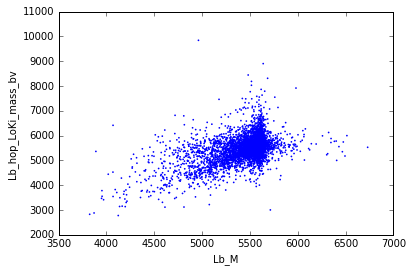

In [45]:
signal_scatter_2 = train_data_signal_with_labels.plot(kind='scatter',
                                                        y='Lb_hop_LoKi_mass_bv',
                                                        x='Lb_M',
                                                         edgecolors='None', s=3)
plt.show()

In [15]:
train_data_background_cut = train_data_background_with_labels.loc[
    train_data_background_with_labels['Lb_hop_LoKi_mass_bv']>linear_cut_1(train_data_background_with_labels['log(Lb_FDCHI2_OWNPV)'])]

train_data_signal_cut = train_data_signal_with_labels.loc[
    train_data_signal_with_labels['Lb_hop_LoKi_mass_bv']>linear_cut_1(train_data_signal_with_labels['log(Lb_FDCHI2_OWNPV)'])]

effb_mhop = float(train_data_background_cut.shape[0])/train_data_background_with_labels.shape[0]
effs_mhop = float(train_data_signal_cut.shape[0])/train_data_signal_with_labels.shape[0]



#cut on alpha
train_data_background_cut_alpha = train_data_background_with_labels.loc[
    train_data_background_with_labels['Lb_HOP']<linear_cut_alpha(train_data_background_with_labels['log(Lb_FDCHI2_OWNPV)'])]

train_data_signal_cut_alpha = train_data_signal_with_labels.loc[
    train_data_signal_with_labels['Lb_HOP']<linear_cut_alpha(train_data_signal_with_labels['log(Lb_FDCHI2_OWNPV)'])]

effb_alphahop1 = float(train_data_background_cut_alpha.shape[0])/train_data_background_with_labels.shape[0]
effs_alphahop1 = float(train_data_signal_cut_alpha.shape[0])/train_data_signal_with_labels.shape[0]



train_data_background_cut_alpha = train_data_background_cut_alpha.loc[
    train_data_background_cut_alpha['Lb_HOP']>linear_cut_alpha_2(train_data_background_cut_alpha['log(Lb_FDCHI2_OWNPV)'])]

train_data_signal_cut_alpha = train_data_signal_cut_alpha.loc[
    train_data_signal_cut_alpha['Lb_HOP']>linear_cut_alpha_2(train_data_signal_cut_alpha['log(Lb_FDCHI2_OWNPV)'])]

effb_alphahop2 = float(train_data_background_cut_alpha.shape[0])/train_data_background_with_labels.shape[0]
effs_alphahop2 = float(train_data_signal_cut_alpha.shape[0])/train_data_signal_with_labels.shape[0]



print "--+ Bakcground efficiencies:"
print "Efficiency of cut on Mhop = ", effb_mhop
print "Efficiency of cut on alphahop (only upper) = ", effb_alphahop1
print "Efficiency of cut on aphahop (upper and lower) = ", effb_alphahop2

print ""

print "--+ Signal efficiencies:"
print "Efficiency of cut on Mhop = ", effs_mhop
print "Efficiency of cut on alphahop (only upper) = ", effs_alphahop1
print "Efficiency of cut on aphahop (upper and lower) = ", effs_alphahop2

--+ Bakcground efficiencies:
Efficiency of cut on Mhop =  0.768273542601
Efficiency of cut on alphahop (only upper) =  0.767656950673
Efficiency of cut on aphahop (upper and lower) =  0.756726457399

--+ Signal efficiencies:
Efficiency of cut on Mhop =  0.998741610738
Efficiency of cut on alphahop (only upper) =  0.953020134228
Efficiency of cut on aphahop (upper and lower) =  0.947147651007


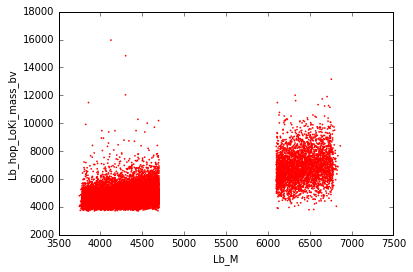

In [23]:
background_scatter_2_cut = train_data_background_cut.plot(kind='scatter',
                                                        y='Lb_hop_LoKi_mass_bv',
                                                        x='Lb_M',
                                                          color='red',
                                                         edgecolors='None', s=3)

plt.show()

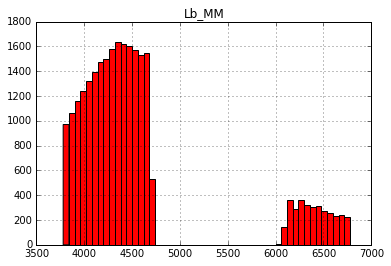

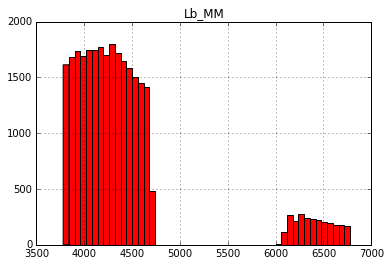

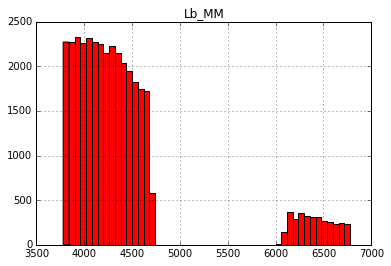

In [22]:
background_mhist_cut = train_data_background_cut.hist(column='Lb_MM',
                                                        color='red', bins=50)

background_mhist_cut_alpha = train_data_background_cut_alpha.hist(column='Lb_MM',
                                                        color='red', bins=50)
background_mhist_nocut = train_data_background_with_labels.hist(column='Lb_MM',
                                                        color='red', bins=50)

plt.show()

In [24]:
background_mhist = train_data_background_with_labels.hist(column='Lb_MM',
                                                        color='red', bins=50)

In [25]:
signal_mhist_cut = train_data_signal_cut.hist(column='Lb_MM',
                                                        color='blue', bins=50)

In [26]:
signal_mhist = train_data_signal_with_labels.hist(column='Lb_MM',
                                                        color='blue', bins=50)

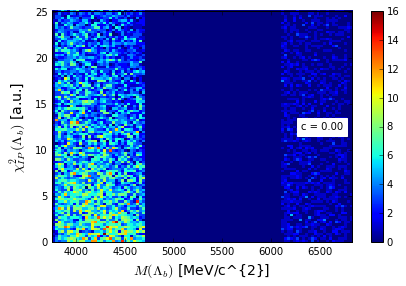

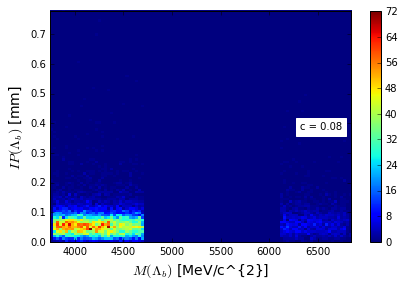

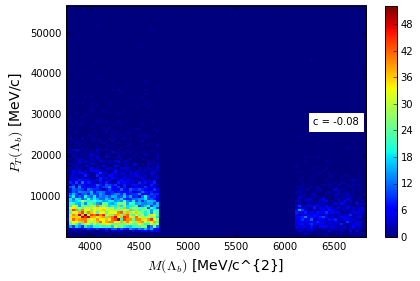

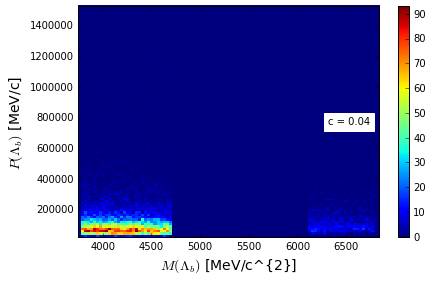

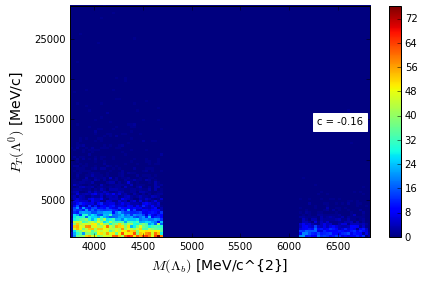

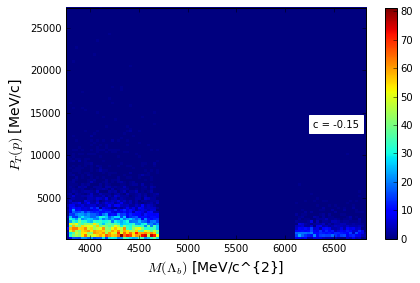

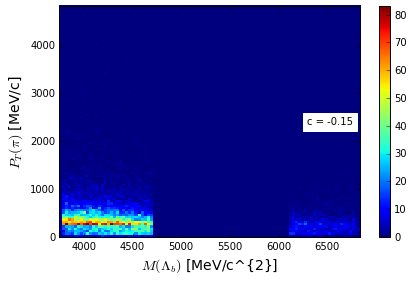

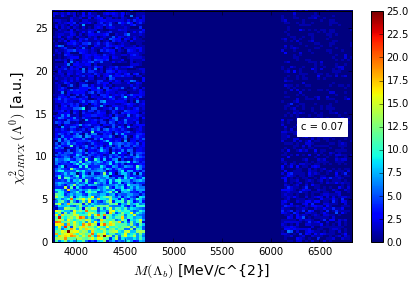

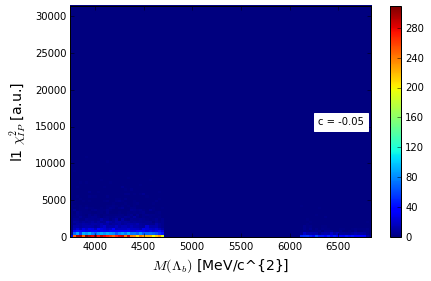

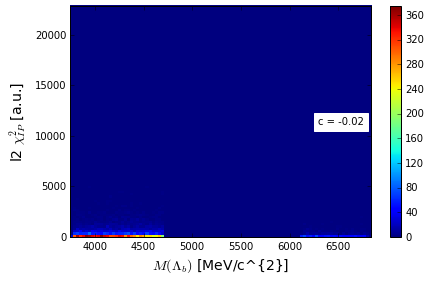

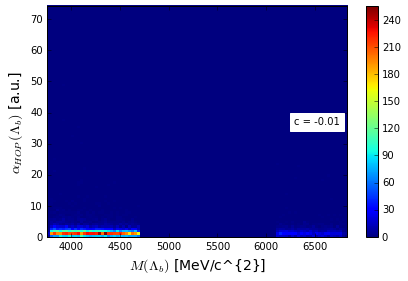

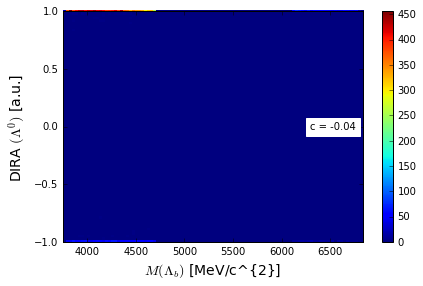

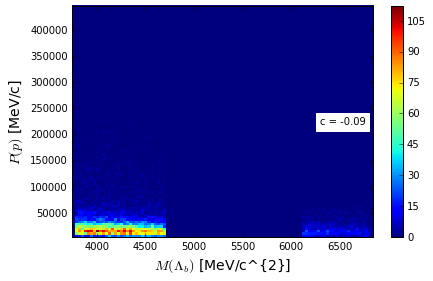

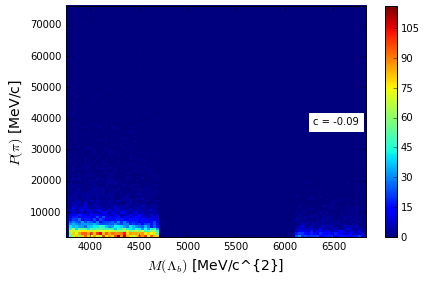

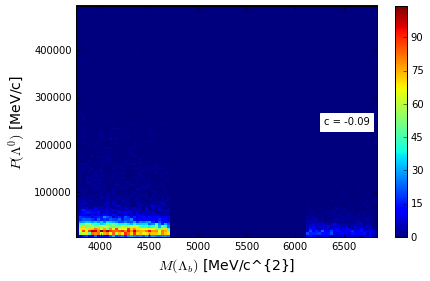

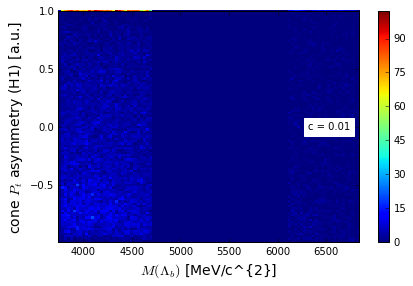

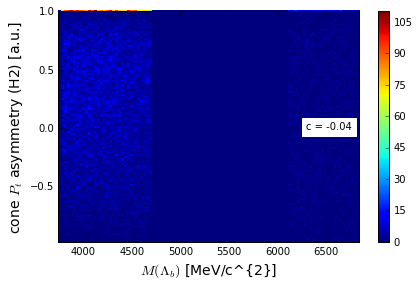

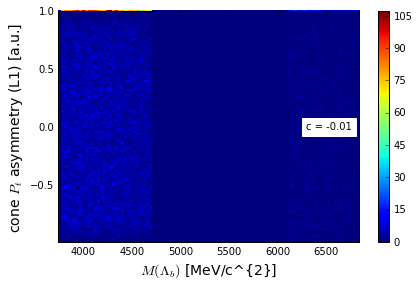

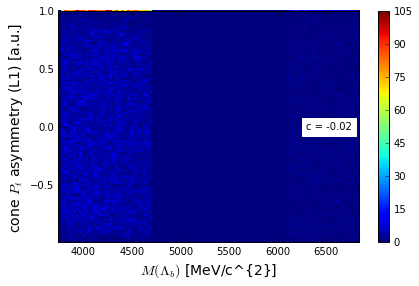

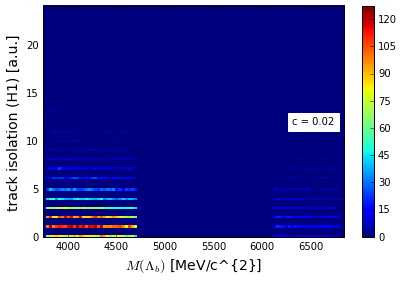

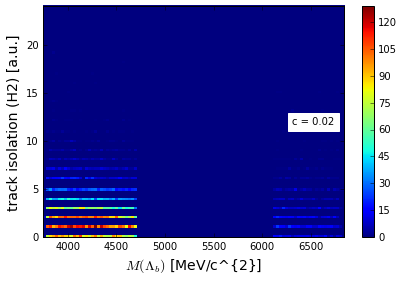

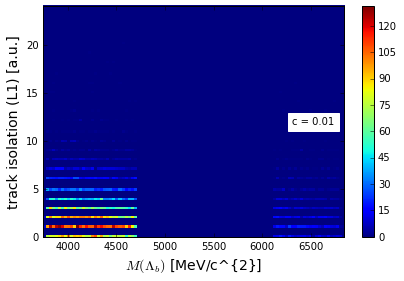

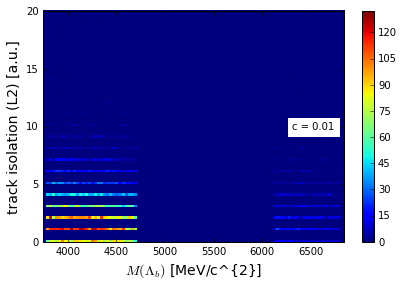

In [46]:
#now we can study the correlation of all variables with the mass
from tools.corr_plot import corr_plot
for var in training_variables:
    x = corr_plot(train_data_background_with_labels, 'Lb_M', var, [100, 100],
                  x_label='{0} {1}'.format(vars_db['Lb_M']['title'], vars_db['Lb_M']['unit']).replace('#','\\'),
                  y_label='{0} {1}'.format(vars_db[var]['title'], vars_db[var]['unit']).replace('#','\\'))
    x.show_hist()
    #x.saveAs(plots_dir+"MC_corr_{0}_{1}.py".format('Lb_M', 'xgboost1'))
    #x.saveAs(plots_dir+"MC_corr_{0}_{1}.pdf".format('Lb_M', 'xgboost1'))




In [33]:
train_data_background_with_labels.to_records()

rec.array([ (0, 5683.998861641606, 5.555068573328962, 4546.146500059143, 4567.927, 6.7894287109375, 0.0),
 (1, 4128.3985745100545, 7.375880859581275, 4300.099068626266, 4304.772, 0.8742122054100037, 0.0),
 (2, 4117.041479926604, 7.035767227534684, 4045.053769729208, 4043.564, 1.2207313776016235, 0.0),
 ...,
 (17133, 4405.4675703782805, 8.623791612439451, 4407.210455605894, 4407.375, 0.9975244402885437, 0.0),
 (17134, 4630.964395910304, 6.6305177516776945, 4341.038585407655, 4336.917, 1.2264460325241089, 0.0),
 (17135, 3759.592541456835, 7.681234394164625, 3969.8225401141162, 3970.387, 0.4736499786376953, 0.0)], 
          dtype=[('index', '<i8'), ('Lb_hop_LoKi_mass_bv', '<f8'), ('log(Lb_FDCHI2_OWNPV)', '<f8'), ('Lb_M', '<f8'), ('Lb_MM', '<f8'), ('Lb_HOP', '<f8'), ('labels', '<f8')])